<a href="https://colab.research.google.com/github/fatjan/learn-tensorflow/blob/master/Flowers_with_Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In [3]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

Rose
Daisy
Dandelion
Sunflowers
Tulips


So, let's create the labels for these 5 classes:

In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [55]:
train_roses_dir = os.path.join(train_dir, 'roses')
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

total_train = len(os.listdir(train_roses_dir)) + len(os.listdir(train_daisy_dir)) \
                                                       + len(os.listdir(train_dandelion_dir)) \
                                                       + len(os.listdir(train_sunflowers_dir)) \
                                                       + len(os.listdir(train_tulips_dir))
print('total train ', total_train)

val_roses_dir = os.path.join(val_dir, 'roses')
val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

total_val =len(os.listdir(val_roses_dir)) + len(os.listdir(val_daisy_dir)) \
                                                       + len(os.listdir(val_dandelion_dir)) \
                                                       + len(os.listdir(val_sunflowers_dir)) \
                                                       + len(os.listdir(val_tulips_dir))

print('total val ', total_val)


total train  2935
total val  735


In [56]:
2935 + 735

3670

In [57]:
641+633+898+699+799

3670

In [9]:
BATCH_SIZE = 100
IMG_SHAPE = 150

# Flip Image Horizontally

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


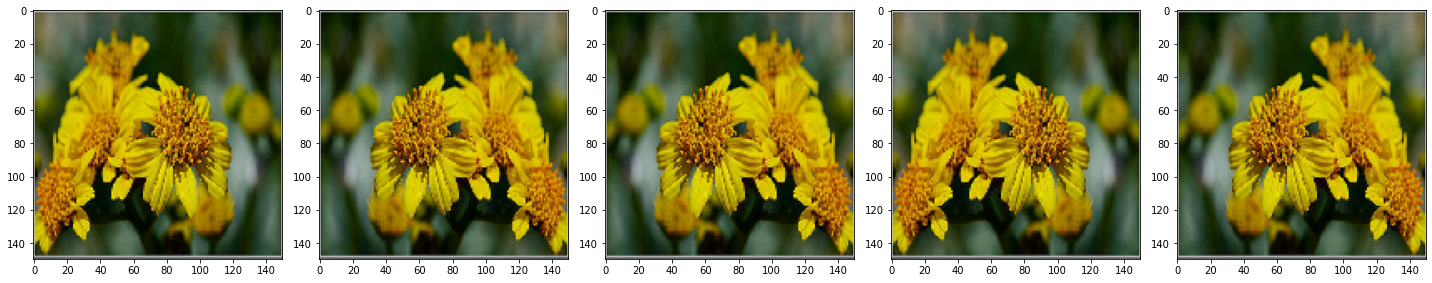

In [17]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Rotate the Image

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


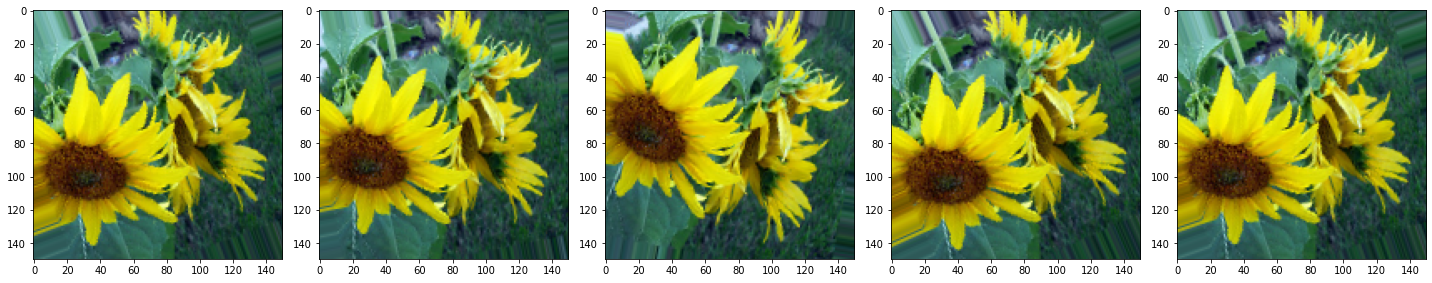

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Zoom Image

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


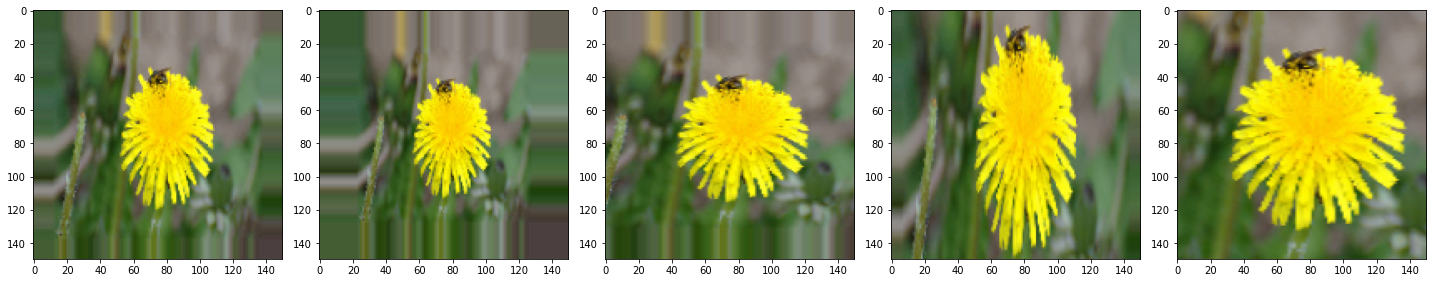

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Putting It all Together

In [75]:
image_gen = ImageDataGenerator(rescale=1./255, 
                               horizontal_flip=True, 
                               rotation_range=45, 
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               fill_mode='nearest')

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE, 
                                               directory=train_dir, 
                                               shuffle=True, 
                                               target_size=(IMG_SHAPE, IMG_SHAPE),
                                               class_mode='sparse'
                                               )

Found 2935 images belonging to 5 classes.


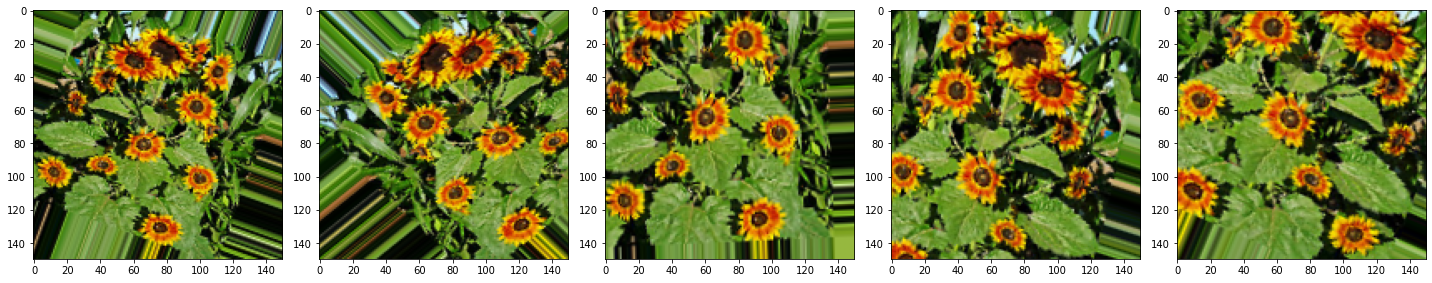

In [27]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# Creating Validation Data Generator

In [76]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 735 images belonging to 5 classes.


# Build the Model

In [77]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(5)
])

In [78]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

# Train The model

In [81]:
epochs=50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
30/30 [==============================] - 26s 875ms/step - loss: 0.9242 - accuracy: 0.6365 - val_loss: 0.8727 - val_accuracy: 0.6544
Epoch 2/50
30/30 [==============================] - 26s 876ms/step - loss: 0.8699 - accuracy: 0.6545 - val_loss: 0.8631 - val_accuracy: 0.6490
Epoch 3/50
30/30 [==============================] - 26s 873ms/step - loss: 0.8413 - accuracy: 0.6733 - val_loss: 0.8212 - val_accuracy: 0.6830
Epoch 4/50
30/30 [==============================] - 26s 879ms/step - loss: 0.8161 - accuracy: 0.6777 - val_loss: 0.8335 - val_accuracy: 0.6735
Epoch 5/50
30/30 [==============================] - 26s 874ms/step - loss: 0.7890 - accuracy: 0.6944 - val_loss: 0.8624 - val_accuracy: 0.6789
Epoch 6/50
30/30 [==============================] - 26s 894ms/step - loss: 0.7835 - accuracy: 0.6988 - val_loss: 0.9020 - val_accuracy: 0.6544
Epoch 7/50
30/30 [==============================] - 26s 871ms/step - loss: 0.7604 - accuracy: 0.6995 - val_loss: 0.7216 - val_accuracy: 0.7102

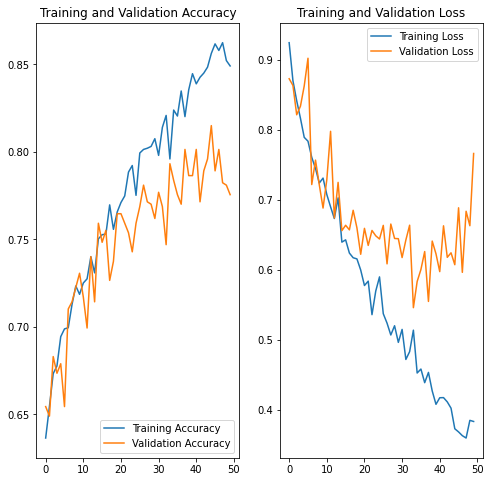

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()